In [1]:
import numpy as np
import sympy
import matplotlib.pyplot as plt
import base64
import pickle
from sympy import symbols, MatrixSymbol, lambdify, Matrix, pprint

from scipy.optimize import minimize
from matplotlib.ticker import FuncFormatter
from sympy import symbols, MatrixSymbol, lambdify
from matplotlib import cm
import random
import matplotlib.colors as mcolors
import scipy
import time
from pathlib import Path
import os
import ast
import pandas as pd
from pathlib import Path
from matplotlib.ticker import ScalarFormatter


import pennylane as qml
from functools import partial
from qiskit.circuit.library import *
from qiskit import *
from qiskit.quantum_info import *
import autograd
from pennylane.wires import Wires
import matplotlib.cm as cm
import base64
from qiskit import *
from qiskit.quantum_info import *

OMP: Info #276: omp_set_nested routine deprecated, please use omp_set_max_active_levels instead.


In [ ]:

# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/QFIM_traced_trainable_global/analog_model_theorem23_take2/Nc_1/GHZ_state/Nr_1/trotter_step_1/1.0K/data.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)
print(df_analog['fixed_params0']['test0']['fixed_params'])
print(df_analog['fixed_params0']['test0']['trainable_params'])
df_analog['fixed_params0']['test0'].keys()

In [ ]:

df_analog['fixed_params0']['test0']['qfim_eigvals']

In [ ]:
#/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10/0/U1_6/reservoirs_2/trotter_step_9/bath_False/data_run_0.pickle
# /Users/sophieblock/QRCCapstone/QFIM_traced_trainable_global/analog_model_new/Nc_2/GHZ_state/Nr_1/trotter_step_8/1.0K/data.pickle
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp

gate_idx = 1
trot = 1
N_r = 1
N_ctrl = 1

# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test15/U1_2/data_run_2.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)

# Load the second dataset
b =f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test15/U1_2/test15_.pickle'
with open(b, 'rb') as f:
    df_digital = pickle.load(f)



# Load the third dataset
c = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test9/U1_2/test9_.pickle'
with open(c, 'rb') as f:
    df_c = pickle.load(f)

# Load the fourth dataset
d =f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_1/10_training_states/fixed_params0/test116/U1_2/test116_.pickle'
with open(d, 'rb') as f:
    df_d = pickle.load(f)

# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]

grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]

# Extract data for the second dataset
costs_digital = [float(i) for i in df_digital['costs'][0]]
grads_per_epoch_digital = [np.array(i) for i in df_digital['grads_per_epoch'][0]]
testing_results_digital = df_digital['testing_results'][0]
fidelity_digital = 1 - df_digital['avg_fidelity'][0]
opt_lr_digital = df_digital['opt_lr'][0]

# Extract data for the third dataset
costs_c = [float(i) for i in df_c['costs'][0]]
grads_per_epoch_c = [np.array(i) for i in df_c['grads_per_epoch'][0]]
testing_results_c = df_c['testing_results'][0]
fidelity_c = 1 - df_c['avg_fidelity'][0]
opt_lr_c = df_c['opt_lr'][0]
print(f"data_run_3__.pickle params: {df_c['init_params'][0]}")
print(f"ts: {df_c['training_states'][0][0]}")
# # Extract data for the fourth dataset
costs_d = [float(i) for i in df_d['costs'][0]]
grads_per_epoch_d = [np.array(i) for i in df_d['grads_per_epoch'][0]]
testing_results_d = df_d['testing_results'][0]
fidelity_d = 1 - df_d['avg_fidelity'][0]
opt_lr_d = df_d['opt_lr'][0]
print(f"data_run_3.pickle ts: {df_d['init_params'][0]}")
print(f"ts: {df_d['training_states'][0][0]}")
# Convert jax arrays to Python floats without rounding
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 65) - np.percentile(data, 35)
    return iqr

# Convert jax arrays to Python floats without rounding
mean_fidelity_analog = round(float(np.mean(testing_results_analog)), 5)
std_fidelity_analog = round(float(np.std(testing_results_analog)), 5)


mean_fidelity_digital = round(float(np.mean(testing_results_digital)), 5)
std_fidelity_digital = round(float(np.std(testing_results_digital)), 5)


mean_fidelity_c = round(float(np.mean(testing_results_c)), 5)
std_fidelity_c = round(float(np.std(testing_results_c)), 5)


mean_fidelity_d = round(float(np.mean(testing_results_d)), 5)
std_fidelity_d = round(float(np.std(testing_results_d)), 5)


# Print the results
print(f"Average Fidelity (10): {mean_fidelity_analog} ± {std_fidelity_analog}")

print(f"\nAverage Fidelity (16): {mean_fidelity_digital} ± {std_fidelity_digital}")

print(f"\nAverage Fidelity (4): {mean_fidelity_c} ± {std_fidelity_c}")

print(f"\nAverage Fidelity (8): {mean_fidelity_d} ± {std_fidelity_d}")

# Plot histograms of testing results
fig, ax = plt.subplots(5, 1, figsize=(12, 36))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_digital)
avg_fidelity_c = np.mean(testing_results_c)
avg_fidelity_d = np.mean(testing_results_d)

label_analog = f"10: {avg_fidelity_analog:.5f}"
label_digital = f"16: {avg_fidelity_digital:.5f}"
label_c = f"4: {avg_fidelity_c:.5f}"
label_d = f"8: {avg_fidelity_d:.5f}"

ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
ax[0].hist([float(i) for i in testing_results_digital], bins=50, alpha=0.5,color='blue', label=label_digital)
ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)
ax[0].hist([float(i) for i in testing_results_d], bins=50,color='red', alpha=0.5, label=label_d)
ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_digital) + 1), costs_digital,color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)
ax[1].plot(range(1, len(costs_d) + 1), costs_d, color='red', label=label_d)
ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

# Plot variance of gradients per epoch
var_analog = [np.var(grads) for grads in grads_per_epoch_analog]
min_abs_analog = [np.min(np.abs(grads)) for grads in grads_per_epoch_analog]
max_abs_analog = [np.max(np.abs(grads)) for grads in grads_per_epoch_analog]

var_digital = [np.var(grads) for grads in grads_per_epoch_digital]
min_abs_digital = [np.min(np.abs(grads)) for grads in grads_per_epoch_digital]
max_abs_digital = [np.max(np.abs(grads)) for grads in grads_per_epoch_digital]

var_c = [np.var(grads) for grads in grads_per_epoch_c]
min_abs_c = [np.min(np.abs(grads)) for grads in grads_per_epoch_c]
max_abs_c = [np.max(np.abs(grads)) for grads in grads_per_epoch_c]

var_d = [np.var(grads) for grads in grads_per_epoch_d]
min_abs_d = [np.min(np.abs(grads)) for grads in grads_per_epoch_d]
max_abs_d = [np.max(np.abs(grads)) for grads in grads_per_epoch_d]

ax[2].plot(range(1, len(var_analog) + 1), var_analog, label=label_analog, linestyle='-', color='orange')
ax[2].plot(range(1, len(var_digital) + 1), var_digital, label=label_digital, linestyle='-', color='blue')
ax[2].plot(range(1, len(var_c) + 1), var_c, label=label_c, linestyle='-', color='green')
ax[2].plot(range(1, len(var_d) + 1), var_d, label=label_d, linestyle='-', color='red')
ax[2].set_title('Variance of Gradients per Epoch', fontsize=25)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=20)

# Plot minimum absolute value of gradients per epoch
ax[3].plot(range(1, len(min_abs_analog) + 1), min_abs_analog, linewidth=1.5, color='orange', label=label_analog, linestyle='-')
ax[3].plot(range(1, len(min_abs_digital) + 1), min_abs_digital, linewidth=1.5, color='blue', label=label_digital, linestyle='-')
ax[3].plot(range(1, len(min_abs_c) + 1), min_abs_c, linewidth=1, color='green', label=label_c, linestyle='-')
ax[3].plot(range(1, len(min_abs_d) + 1), min_abs_d, linewidth=1, color='red', label=label_d, linestyle='-')
ax[3].set_title('Minimum Absolute Value of Gradients per Epoch', fontsize=25)
ax[3].set_xlabel('Epoch')
ax[3].set_yscale('log')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].legend(fontsize=20)

# Plot maximum absolute value of gradients per epoch
ax[4].plot(range(1, len(max_abs_analog) + 1), max_abs_analog, linewidth=2, color='orange', label=label_analog, linestyle='-.')
ax[4].plot(range(1, len(max_abs_digital) + 1), max_abs_digital, linewidth=2, color='blue', label=label_digital, linestyle='-.')
ax[4].plot(range(1, len(max_abs_c) + 1), max_abs_c, linewidth=2, color='green', label=label_c, linestyle='-.')
ax[4].plot(range(1, len(max_abs_d) + 1), max_abs_d, linewidth=2, color='red', label=label_d, linestyle='-.')
ax[4].set_title('Maximum Absolute Value of Gradients per Epoch', fontsize=25)
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pickle
import base64
import jax.numpy as jnp

gate_idx = 4
trot = 1
N_r = 1
N_ctrl = 1

# Load the first dataset
a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_9.pickle'
with open(a, 'rb') as f:
    df_analog = pickle.load(f)

# Load the second dataset
b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_19.pickle'
with open(b, 'rb') as f:
    df_digital = pickle.load(f)

# Load the third dataset
c = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_3.pickle'
with open(c, 'rb') as f:
    df_c = pickle.load(f)

# Load the fourth dataset
d = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_7.pickle'
with open(d, 'rb') as f:
    df_d = pickle.load(f)

# Extract data for the first dataset
costs_analog = [float(i) for i in df_analog['costs'][0]]

grads_per_epoch_analog = [np.array(i) for i in df_analog['grads_per_epoch'][0]]
testing_results_analog = df_analog['testing_results'][0]
fidelity_analog = 1 - df_analog['avg_fidelity'][0]
opt_lr_analog = df_analog['opt_lr'][0]

# Extract data for the second dataset
costs_digital = [float(i) for i in df_digital['costs'][0]]
grads_per_epoch_digital = [np.array(i) for i in df_digital['grads_per_epoch'][0]]
testing_results_digital = df_digital['testing_results'][0]
fidelity_digital = 1 - df_digital['avg_fidelity'][0]
opt_lr_digital = df_digital['opt_lr'][0]

# Extract data for the third dataset
costs_c = [float(i) for i in df_c['costs'][0]]
grads_per_epoch_c = [np.array(i) for i in df_c['grads_per_epoch'][0]]
testing_results_c = df_c['testing_results'][0]
fidelity_c = 1 - df_c['avg_fidelity'][0]
opt_lr_c = df_c['opt_lr'][0]
print(f"data_run_3__.pickle params: {df_c['init_params'][0]}")
print(f"ts: {df_c['training_states'][0][0]}")
# # Extract data for the fourth dataset
costs_d = [float(i) for i in df_d['costs'][0]]
grads_per_epoch_d = [np.array(i) for i in df_d['grads_per_epoch'][0]]
testing_results_d = df_d['testing_results'][0]
fidelity_d = 1 - df_d['avg_fidelity'][0]
opt_lr_d = df_d['opt_lr'][0]
print(f"data_run_3.pickle ts: {df_d['init_params'][0]}")
print(f"ts: {df_d['training_states'][0][0]}")
# Convert jax arrays to Python floats without rounding
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 65) - np.percentile(data, 35)
    return iqr

# Convert jax arrays to Python floats without rounding
mean_fidelity_analog = round(float(np.mean(testing_results_analog)), 5)
std_fidelity_analog = round(float(np.std(testing_results_analog)), 5)
var_grad_analog = float(jnp.mean(df_analog['var_grad'][0]))
iqr_var_grad_analog = calculate_iqr(jnp.array(df_analog['var_grad'][0]))
min_grad_analog = float(jnp.min(df_analog['min_grad'][0]))
max_grad_analog = float(jnp.max(df_analog['max_grad'][0]))

mean_fidelity_digital = round(float(np.mean(testing_results_digital)), 5)
std_fidelity_digital = round(float(np.std(testing_results_digital)), 5)
var_grad_digital = float(jnp.mean(df_digital['var_grad'][0]))
iqr_var_grad_digital = calculate_iqr(jnp.array(df_digital['var_grad'][0]))
min_grad_digital = float(jnp.min(df_digital['min_grad'][0]))
max_grad_digital = float(jnp.max(df_digital['max_grad'][0]))

mean_fidelity_c = round(float(np.mean(testing_results_c)), 5)
std_fidelity_c = round(float(np.std(testing_results_c)), 5)
var_grad_c = float(jnp.mean(df_c['var_grad'][0]))
iqr_var_grad_c = calculate_iqr(jnp.array(df_c['var_grad'][0]))
min_grad_c = float(jnp.min(df_c['min_grad'][0]))
max_grad_c = float(jnp.max(df_c['max_grad'][0]))

mean_fidelity_d = round(float(np.mean(testing_results_d)), 5)
std_fidelity_d = round(float(np.std(testing_results_d)), 5)
var_grad_d = float(jnp.mean(df_d['var_grad'][0]))
iqr_var_grad_d = calculate_iqr(jnp.array(df_d['var_grad'][0]))
min_grad_d = float(jnp.min(df_d['min_grad'][0]))
max_grad_d = float(jnp.max(df_d['max_grad'][0]))

# Print the results
print(f"Average Fidelity (10): {mean_fidelity_analog} ± {std_fidelity_analog}")
print(f"Initial Variance (10): {var_grad_analog:.5e}, IQR: {iqr_var_grad_analog:.5e}, Min Gradient: {min_grad_analog:.5e}, Max Gradient: {max_grad_analog:.5e}")

print(f"\nAverage Fidelity (16): {mean_fidelity_digital} ± {std_fidelity_digital}")
print(f"Initial Variance (16): {var_grad_digital:.5e}, IQR: {iqr_var_grad_digital:.5e}, Min Gradient: {min_grad_digital:.5e}, Max Gradient: {max_grad_digital:.5e}")

print(f"\nAverage Fidelity (4): {mean_fidelity_c} ± {std_fidelity_c}")
print(f"Initial Variance (4): {var_grad_c:.5e}, IQR: {iqr_var_grad_c:.5e}, Min Gradient: {min_grad_c:.5e}, Max Gradient: {max_grad_c:.5e}")

print(f"\nAverage Fidelity (8): {mean_fidelity_d} ± {std_fidelity_d}")
print(f"Initial Variance (8): {var_grad_d:.5e}, IQR: {iqr_var_grad_d:.5e}, Min Gradient: {min_grad_d:.5e}, Max Gradient: {max_grad_d:.5e}")

# Plot histograms of testing results
fig, ax = plt.subplots(5, 1, figsize=(12, 36))

# Calculate average fidelity and standard deviation

avg_fidelity_analog = np.mean(testing_results_analog)
avg_fidelity_digital = np.mean(testing_results_digital)
avg_fidelity_c = np.mean(testing_results_c)
avg_fidelity_d = np.mean(testing_results_d)

label_analog = f"10: {avg_fidelity_analog:.5f}"
label_digital = f"16: {avg_fidelity_digital:.5f}"
label_c = f"4: {avg_fidelity_c:.5f}"
label_d = f"8: {avg_fidelity_d:.5f}"

ax[0].hist([float(i) for i in testing_results_analog], bins=50, alpha=0.5,color='orange', label=label_analog)
ax[0].hist([float(i) for i in testing_results_digital], bins=50, alpha=0.5,color='blue', label=label_digital)
ax[0].hist([float(i) for i in testing_results_c], bins=50,color='green', alpha=0.5, label=label_c)
ax[0].hist([float(i) for i in testing_results_d], bins=50,color='red', alpha=0.5, label=label_d)
ax[0].legend(fontsize=20, loc="upper left")
ax[0].set_title('Test Results')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')

# Plot costs per epoch
ax[1].plot(range(1, len(costs_analog) + 1), costs_analog,color='orange', label=label_analog)
ax[1].plot(range(1, len(costs_digital) + 1), costs_digital,color='blue', label=label_digital)
ax[1].plot(range(1, len(costs_c) + 1), costs_c, color='green', label=label_c)
ax[1].plot(range(1, len(costs_d) + 1), costs_d, color='red', label=label_d)
ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=20)

# Plot variance of gradients per epoch
var_analog = [np.var(grads) for grads in grads_per_epoch_analog]
min_abs_analog = [np.min(np.abs(grads)) for grads in grads_per_epoch_analog]
max_abs_analog = [np.max(np.abs(grads)) for grads in grads_per_epoch_analog]

var_digital = [np.var(grads) for grads in grads_per_epoch_digital]
min_abs_digital = [np.min(np.abs(grads)) for grads in grads_per_epoch_digital]
max_abs_digital = [np.max(np.abs(grads)) for grads in grads_per_epoch_digital]

var_c = [np.var(grads) for grads in grads_per_epoch_c]
min_abs_c = [np.min(np.abs(grads)) for grads in grads_per_epoch_c]
max_abs_c = [np.max(np.abs(grads)) for grads in grads_per_epoch_c]

var_d = [np.var(grads) for grads in grads_per_epoch_d]
min_abs_d = [np.min(np.abs(grads)) for grads in grads_per_epoch_d]
max_abs_d = [np.max(np.abs(grads)) for grads in grads_per_epoch_d]

ax[2].plot(range(1, len(var_analog) + 1), var_analog, label=label_analog, linestyle='-', color='orange')
ax[2].plot(range(1, len(var_digital) + 1), var_digital, label=label_digital, linestyle='-', color='blue')
ax[2].plot(range(1, len(var_c) + 1), var_c, label=label_c, linestyle='-', color='green')
ax[2].plot(range(1, len(var_d) + 1), var_d, label=label_d, linestyle='-', color='red')
ax[2].set_title('Variance of Gradients per Epoch', fontsize=25)
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=20)

# Plot minimum absolute value of gradients per epoch
ax[3].plot(range(1, len(min_abs_analog) + 1), min_abs_analog, linewidth=1.5, color='orange', label=label_analog, linestyle='-')
ax[3].plot(range(1, len(min_abs_digital) + 1), min_abs_digital, linewidth=1.5, color='blue', label=label_digital, linestyle='-')
ax[3].plot(range(1, len(min_abs_c) + 1), min_abs_c, linewidth=1, color='green', label=label_c, linestyle='-')
ax[3].plot(range(1, len(min_abs_d) + 1), min_abs_d, linewidth=1, color='red', label=label_d, linestyle='-')
ax[3].set_title('Minimum Absolute Value of Gradients per Epoch', fontsize=25)
ax[3].set_xlabel('Epoch')
ax[3].set_yscale('log')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].legend(fontsize=20)

# Plot maximum absolute value of gradients per epoch
ax[4].plot(range(1, len(max_abs_analog) + 1), max_abs_analog, linewidth=2, color='orange', label=label_analog, linestyle='-.')
ax[4].plot(range(1, len(max_abs_digital) + 1), max_abs_digital, linewidth=2, color='blue', label=label_digital, linestyle='-.')
ax[4].plot(range(1, len(max_abs_c) + 1), max_abs_c, linewidth=2, color='green', label=label_c, linestyle='-.')
ax[4].plot(range(1, len(max_abs_d) + 1), max_abs_d, linewidth=2, color='red', label=label_d, linestyle='-.')
ax[4].set_title('Maximum Absolute Value of Gradients per Epoch', fontsize=25)
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=20)

plt.tight_layout()
plt.show()

In [ ]:
gate_idx = 0
trot = 2
N_r = 1
N_ctrl = 1
selected_sets = [0]  # List of dataset indices

def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr

# Initialize the paths to the datasets (as a loop)
data_files = [f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
              for run_idx in selected_sets]
def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad
# Load the datasets and extract relevant data
data_results = []
for i,file_path in enumerate(data_files):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    trainin_states = data['training_states'][0][0]
    

    
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    # Print the results
    print(f"\nAverage Fidelity ({selected_sets[i]+1}): {mean_fidelity} ± {std_fidelity}")
    print(f"Initial Variance ({selected_sets[i]+1}): {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")

    print(f"From test: {np.mean(data['var_grad'][0]):.5e}, IQR: {calculate_iqr(data['var_grad'][0]):.5e}, Min Gradient: {data['min_grad'][0]:.5e}, Max Grad: {data['max_grad'][0]:.5e}")

    
    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    

    

    data_results.append({
        'costs': costs,
        'var_grad': var_grad,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'avg_fidelity':fidelity,
        'testing_results': testing_results
    })

# Now plot the results
fig, ax = plt.subplots(5, 1, figsize=(8, 20))

# Loop over datasets and add each to the plots
for idx, dataset in enumerate(data_results):
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'Set {selected_sets[idx]+1} [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_grad']) + 1), dataset['var_grad'], label=label)
    ax[2].set_yscale('log')
    # Plot minimum absolute value of gradients per epoch
    ax[3].plot(range(1, len(dataset['min_grad']) + 1), dataset['min_grad'],linewidth=1, label=label)
    ax[3].set_yscale('log')
    # Plot maximum absolute value of gradients per epoch
    ax[4].plot(range(1, len(dataset['max_grad']) + 1), dataset['max_grad'], label=label)
    ax[4].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=12)

ax[3].set_title('Minimum Absolute Value of Gradients per Epoch')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].set_yscale('log')  # Log scale as before
ax[3].legend(fontsize=12)

ax[4].set_title('Maximum Absolute Value of Gradients per Epoch')
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
# Define the parameters
gate_idx = 
trot = 3
N_r = 1
N_ctrl = 2
selected_sets = [0,1,2,3,9]  # List of selected data run indices
trainsize = 20 
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    return iqr
# Initialize the plot for costs per epoch
plt.figure(figsize=(10, 8))
# Loop through the selected sets
# for idx, run_idx in enumerate(selected_sets):
for idx, run_idx in enumerate(selected_sets):
    # Load the dataset
    file_path =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost/0/U{N_ctrl}_{run_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_1.pickle'
    # file_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract data
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    testing_results = data['testing_results'][0]
    fidelity = 1 - data['avg_fidelity'][0]
    opt_lr = data['opt_lr'][0]
    
    # Convert jax arrays to Python floats without rounding
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)

    # Print the results
    print(f"U {run_idx + 1}:")
    print(f"Average Fidelity: {mean_fidelity} ± {std_fidelity}")

    
    plt.hist(testing_results, bins=50, alpha=0.5,label = f'U{N_ctrl}_{run_idx}')




plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

In [ ]:
# Define the parameters
gate_idx = 1
trot = 1
N_r = 1
N_ctrl = 1
selected_sets = [3,9]  # List of selected data run indices
trainsize = 20
def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 75) - np.percentile(data, 25)
    return iqr
# Initialize the plot for costs per epoch
plt.figure(figsize=(10, 8))
# Loop through the selected sets
for idx, run_idx in enumerate(selected_sets):
    # Load the dataset
    file_path =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    file_path = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_test/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_{run_idx}.pickle'
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract data
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    testing_results = data['testing_results'][0]
    fidelity = 1 - data['avg_fidelity'][0]
    opt_lr = data['opt_lr'][0]
    
    # Convert jax arrays to Python floats without rounding
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    var_grad = float(jnp.mean(data['var_grad'][0]))
    iqr_var_grad = calculate_iqr(jnp.array(data['var_grad'][0]))
    min_grad = float(jnp.min(data['min_grad'][0]))
    max_grad = float(jnp.max(data['max_grad'][0]))

    # Print the results
    print(f"Set {run_idx + 1} (data_run_{run_idx}):")
    print(f"Average Fidelity: {mean_fidelity} ± {std_fidelity}")
    print(f"Initial Variance: {var_grad:.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {min_grad:.5e}, Max Gradient: {max_grad:.5e}\n")
    # Plot the cost per epoch for this dataset
    plt.plot(range(1, len(costs) + 1), costs, label=f'Set {run_idx + 1} (data_run_{run_idx})')
    

# Finalize the plot
plt.title('Costs per Epoch for Selected Sets')
plt.xlabel('Epoch')
plt.ylabel('Cost')
plt.legend(loc='upper right', fontsize=8)
plt.tight_layout()
plt.show()

In [10]:
gate_idx =4
trot = 8
N_r = 1
N_ctrl = 2
trainsize = 20
temp = 1*10**-2.9
# /Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_2/10_training_states_no_opt/fixed_params0/1.0K/test22
a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_0.pickle'
b =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_1.pickle'

# a =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_t1.0/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    dfb = pickle.load(f)
# results_dict = df['preopt_results']
print(df['epochs'])
print(dfb['epochs'])
fig, ax = plt.subplots(figsize=(16, 9))
# gate_idx =gate_idx + 1
costs = [float(i) for i in df['costs'][0]]
costsb = [float(i) for i in dfb['costs'][0]]
# rocs = [float(i) for i in df['rocs'][0]]
# print(df['selected_indices'][0])
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
testing_results = df['testing_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['stored_epoch'][0],df['a_marked'][0]*1e-3, (df['a_marked'][0]*temp)*1 )
print(df['epochs'][0])
# print(df['training_states'][0][0])
# print(df['init_params'][0])
label1 =f"analog: {fidelity:6e}"
# print(df['init_params'][0][trot:])
# results_dict = df['preopt_results']

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)

test_resultsb = [float(i) for i in dfb['testing_results'][0]] 
ax.hist(test_resultsb, bins=50, alpha=0.5,label = 'b')
print(f"final_cost: {1-costs[-1]:.4f}. avg fidelity 1: {np.mean(test_results):3f} +- {np.std(test_results):3f}\n")
print(test_results)
fig, ax = plt.subplots(figsize=(16, 9))

ax.plot(costsb)
ax.plot(costs)

FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_epoch1000/U2_1/reservoirs_2/trotter_step_30/bath_False/data_run_1.pickle'

In [ ]:
gate_idx =0
trot = 28
N_ctrl = 2
trainsize = 20
temp = 1*10**-2.9
res_count = 1
# /Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_1/reservoirs_1/trotter_step_2/10_training_states_no_opt/fixed_params0/1.0K/test22
# a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/test22/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
# a =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_t1.0/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
# # results_dict = df['preopt_results']
fig, ax = plt.subplots(figsize=(16, 9))
# # gate_idx =gate_idx + 1
costs = [float(i) for i in df['costs'][0]]
# rocs = [float(i) for i in df['rocs'][0]]
# # print(df['stored_epoch'][0],df['selected_indices'][0])
# grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
test_results = df['testing_results'][0]
fidelity = df['avg_fidelity'][0]
# # print(df['stored_epoch'][0],df['backup_epoch'][0], (df['a_marked'][0]*temp)*1 )
# # print(df['backup_epoch'][0])
# # print(df['training_states'][0][0])
# # print(df['init_params'][0])
label1 =f"analog: {fidelity:6e}"
params = df['init_params'][0]
params = '[' + ', '.join([f"{x:.16f}" for x in params]) + ']'

print(params)
print(f"final_cost: {1-costs[-1]:.4f}. avg fidelity 1: {fidelity:3f} +- {np.std(test_results):3f}")
# print(df['stored_epoch'][0],df['selected_indices'][0])
print(f"lr: {df['opt_lr'][0]:.5f}, train state 0: ",df['training_states'][0][0])
# gate = df['Gate'][0]
# decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# #print(decoded_qobj)
print(df.keys())
test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)

# add=0
# if N_ctrl ==3:
#     add = 5
# /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_10/bath_False/data_run_0.pickle
# b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}/0/U{N_ctrl}_{gate_idx}/reservoirs_{res_count}/trotter_step_{trot}/bath_False/data_run_0.pickle'

# b =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}_optimized_by_cost_test/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/A5_to_A7__.pickle'

with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)
# rocs2 = [float(i) for i in df['rocs'][0]]
# print(df['init_params'][0][trot:])
results_dict = df['preopt_results']
# a_marked = df['a_marked'][0]
costs2 = [float(i) for i in df['costs'][0]]
testing_results2 = df['testing_results'][0]
fidelity2 = df['avg_fidelity'][0]
# print(df['stored_epoch'][0],df['selected_indices'][0])
label2 = f"test 53: {fidelity2:6e}"
gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
# results_dict = df['preopt_results']
test_results2 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results2, bins=50, alpha=0.5,label = label2)
print(f"\nfinal_cost: {1-costs2[-1]:.4f}. avg fidelity 3: {fidelity2:3f} +- {np.std(test_results2):3f}")
print(df['stored_epoch'][0],df['selected_indices'][0])
print(f"lr: {df['opt_lr'][0]:.5f}")
print(df['init_params'][0])

# c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_1.pickle'
# # c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize+add}/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_2.pickle'

# with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
#     df = pickle.load(f)

# costs3 = [float(i) for i in df['costs'][0]]

# fidelity3 = df['avg_fidelity'][0]
# results_dict = df['preopt_results']
# label3 =  f"analog (trots: {trot}): {fidelity3:6e}"

# test_results3 =  [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
# # results_dict = df['preopt_results']
# print(f"\nfinal_cost: {1-costs3[-1]:.4f}. avg fidelity 3: {np.mean(test_results3):3f} +- {np.std(test_results3):3f}")
# print(df['stored_epoch'][0],df['selected_indices'][0])
# # print(f"lr: {df['opt_lr'][0]:.5f}, replacement indices: ",df['replacement_indices'][0])
# # print(df['init_params'][0])
# ax.hist(test_results3, bins=50, alpha=0.5,label = label3)




# # /Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_all_results/0/U1_9/reservoirs_1/trotter_step_3/bath_False/data_run_3.pickle
# d =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_{trainsize}/0/U{N_ctrl}_{gate_idx}/reservoirs_{res_count}/trotter_step_{trot}/bath_False/data_run_1.pickle'
# with open(d, 'rb') as f:  # Note 'rb' here, which means read binary
#     df = pickle.load(f)



# costs4 = [float(i) for i in df['costs'][0]]

# fidelity4 = df['avg_fidelity'][0]

# label4 =  f"digital (trots: {trot}): {fidelity4:6e}"

# test_results4 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed

# print(f"\nfinal_cost: {1-costs4[-1]:.4f}. avg fidelity 4: {np.mean(test_results4):3f} +- {np.std(test_results4):3f}")

# print(f"lr: {df['opt_lr'][0]:.5f}, train state 0: ",df['training_states'][0][0])
# print(df['stored_epoch'][0],df['selected_indices'][0])
# # print(df['selected_indices'][0])
# ax.hist(test_results4, bins=50, alpha=0.5,label = label4)



# ax.legend(fontsize=20)

# /analog_results_trainable_global/trainsize_20/0/U3_2/reservoirs_1/trotter_step_24/bath_False/data_run_1.pickle

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import pickle

# Load the first dataset
a = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:
    df = pickle.load(f)

test_results1 = [float(i) for i in df['testing_results'][0]]
label1 = f"analog: {df['avg_fidelity'][0]:6e}"

# Load the second dataset
b = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_0.pickle'
with open(b, 'rb') as f:
    df = pickle.load(f)

test_results2 = [float(i) for i in df['testing_results'][0]]
label2 = f"test 53: {df['avg_fidelity'][0]:6e}"

# Load the third dataset
c = '/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20/0/U2_0/reservoirs_1/trotter_step_8/bath_False/data_run_1.pickle'
with open(c, 'rb') as f:
    df = pickle.load(f)

test_results3 = [float(i) for i in df['testing_results'][0]]
label3 = f"analog (trots: 8): {df['avg_fidelity'][0]:6e}"

# Plot using seaborn histplot
plt.figure(figsize=(12, 8))

sns.histplot(test_results1, bins=50, label=label1, color="blue", stat='probability',alpha=0.5)
sns.histplot(test_results2, bins=50, label=label2, color="green",stat='probability', alpha=0.5)
sns.histplot(test_results3, bins=50, label=label3, color="orange",stat='probability', alpha=0.5)

plt.legend()
plt.title('Fidelity Distributions from Testing Results')
plt.xlabel('Fidelity')
plt.ylabel('Count')
plt.show()


In [ ]:
costs[-1]

In [ ]:
plt.plot(range(1,len(costs)+1),costs, label = label1)
linestyle =  '--'


plt.plot(range(1,len(costs2)+1),costs2, label = label2)

plt.plot(range(1,len(costs3)+1),costs3, label = label3, linestyle=linestyle)
# plt.plot(range(1,len(costs4)+1),costs4, label = label4, linestyle=linestyle)
plt.legend()

# print(costs[1490:])
# len(costs)

In [ ]:
plt.plot(rocs)

In [ ]:

b =1*(10**-2.55)

print(b*3.42e-04)
b = 1 * (10**-3)

# b = 1**10-2.5
print(b*3.42e-04)

In [ ]:
i = 1400
plt.plot(costs[i:])
plt.plot(costs2[i:])
costs[-4]-costs[-1]

In [ ]:
thresh =9.638869624924435e-07
thresh = 7.866838e-07
for i,a in enumerate(rocs):
    if a < 0.0 and np.abs(a) < thresh:
        print(i, a)

In [ ]:
print(rocs[11]*1e-3)
# print(np.abs(rocs[50])*1e-2)
# rocs[850]
# print(rocs2[:20])

In [ ]:
print(rocs[8]*1e-3)

In [ ]:
import jax.numpy as jnp
import numpy
def calculate_gradient_stats_per_state(gradients,abs_grad=True):
    
    """Calculate the mean and variance of the gradients for each state."""
    if abs_grad:
        gradients = jnp.abs(gradients)
    mean_grad = jnp.mean(gradients, axis=-1)  # Mean across parameters for each state
    mean_grad_squared = jnp.mean(gradients ** 2, axis=-1)  # Mean squared gradients across parameters
    var_grad = mean_grad_squared - mean_grad ** 2  # Variance per state
    grad_norm = jnp.linalg.norm(gradients, axis=-1)  # Norm per state

    return mean_grad, var_grad, grad_norm
def analyze_results(results_dict, num_datasets):
    """
    Analyze results dictionary to select the best datasets for initial training, replacement, and fine-tuning.
    """
    # Lists to store metrics for normalization purposes
    var_grad_means,var_var_grads = [], []
    min_gradvars,max_gradvars = [], []
    min_mean_grads,max_mean_grads = [], []
    grad_norms, mean_grads = [],[]
    min_norm_var_grads, max_norm_var_grads = [],[]
    normalized_var_grad_norms = []

    # Initialize tracking for scores and results
    results = {}

    # Loop through all datasets in the results_dict
    for set_idx in range(num_datasets):
        # Extract necessary statistics for the current dataset
        # meangrad_norm, vargrad_norm, gradnorm_norm = calculate_gradient_stats_per_state(normalized_gradients_per_state)
        result = results_dict[f'dataset_{set_idx}']
        var_grad_mean = result["Mean(Var Grad)"]
        variance_of_variance_gradients_normalized =result["Var(Var Grad) [normalized]"]
        mean_grad = result["Mean(Mean Grad)"]
        min_grad, max_grad = result['Min Gradient'], result['Max Gradient']
        min_vargrad, max_vargrad = result['min_var_grad_means'], result['max_var_grad_means']
        min_gradvars.append(min_vargrad)
        max_gradvars.append(max_vargrad)
        min_mean_grads.append(min_grad)
        max_mean_grads.append(max_grad)
        var_var_grad = result["Var(Var Grad)"]
        grad_norm = result["Gradient Norm"]
        norm_var_grad_mean = result["Mean(Var Grad) [normalized]"]

        # Collect statistics for normalization purposes
        var_grad_means.append(var_grad_mean)
        var_var_grads.append(var_var_grad)
        mean_grads.append(mean_grad)
        grad_norms.append(grad_norm)
        
        normalized_var_grad_norms.append(np.float64(variance_of_variance_gradients_normalized))

    # Compute min and max for normalization
    min_var_var,max_var_var = min(var_var_grads), max(var_var_grads)
    print(np.array(mean_grads).shape)
    print(f"Variance of the gradients: [min: {min(min_gradvars):.2e}), max: {max(max_gradvars):.2e}]")
    print(f"Mean gradients: [min: {min(min_mean_grads):.2e}), max: {max(max_mean_grads):.2e}]")
    min_var_grad = min(min_gradvars)
    max_var_grad = max(max_gradvars)
    min_mean = min(min_mean_grads)
    max_mean = max(max_mean_grads)
    min_norm_var_grad = min(normalized_var_grad_norms*10)
    max_norm_var_grad = max(normalized_var_grad_norms*10)
    print(f"normalized_var_grad_norms: {normalized_var_grad_norms}")
    log_var_grad_norms = [numpy.float64(np.log2(el)) for el in normalized_var_grad_norms]
    print(f"log_var_grad_norms: {log_var_grad_norms}")
    print(f"min: {min_norm_var_grad:.2e}, max: {max_norm_var_grad:.2e}")
    # Function for normalizing metrics
    def normalize_metric(value, min_val, max_val, epsilon=1e-6, upper_bound=0.999):
        if max_val > min_val:
            # Adjust to avoid exactly 0.0 and 1.0, and ensure upper bound doesn't reach 1.0
            normalized_value = (value - min_val ) / (max_val - min_val + 2 )
            return min(normalized_value, upper_bound)
        else:
            return 0.5  # Neutral value if min and max are the same
        
    to_print = [0,1,2,3,4,5,6,7,8,9]
    alpha = 1.0
    # Weights for each metric in the weighted sum approach

    w1 = 0.8  # Weight for normalized variance of the gradient
    w2 = .2# Weight for normalized gradient norm
    w3 = 0.5 # Weight for normalized variance of the variance of the gradient

    beta =0.5

    max_scale = max(max_mean,max_var_grad)
    min_scale = min(min_mean,min_var_grad)
    print(f"Scaled: [min: {min_scale:.2e}), max: {max_scale:.2e}]")
    # Now calculate scores and store them in the results
    for set_idx in range(num_datasets):
        i = set_idx
        result = results_dict[f'dataset_{set_idx}']

        # Extract necessary statistics for the current dataset
        var_grad_mean = result["Mean(Var Grad)"]
        var_var_grad = result["Var(Var Grad)"]
        mean_grad = np.mean(result["Mean(Mean Grad)"])
        var_mean_grad = result["Var(Mean Grad)"]
        grad_norm = result["Gradient Norm"]
        X,y = result["dataset"]
        
        mean_variance_of_gradient_normalized =result["Mean(Var Grad) [normalized]"]
        variance_of_variance_gradients_normalized =normalized_var_grad_norms[set_idx]
        average_of_mean_gradients_normalized_abs =result["Mean(Mean Grad) [normalized]"]
        variance_of_mean_gradients_normalized =result["Var(Mean Grad) [normalized]"]
        normalized_grad_norm = result["Norm(Gradient Norm)"]
        
        
        # Normalize var_grad_mean and grad_norm
        normalized_mean_variance_of_gradient = normalize_metric(var_grad_mean, min_scale,max_scale)
        normalized_mean_gradient_score = normalize_metric(mean_grad,  min_scale,max_scale)
        # normalized_mean_variance_of_gradient_normalized = normalize_metric(mean_variance_of_gradient_normalized, min_var_grad, max_var_grad)
        normalized_var_var_grads = normalize_metric(var_var_grad,   min_var_var,max_var_var)
        normalized_var_mean_gradient = normalize_metric(var_mean_grad, min_scale,max_scale)
        variance_of_variance_gradients_normalized_scaled = normalize_metric(variance_of_variance_gradients_normalized, min_norm_var_grad,max_norm_var_grad)
        # normalized_grad_norm_score = normalize_metric(grad_norm, 0, 1)
        # normalized_mean_variance_of_gradient_normalized = normalize_metric(mean_of_variance_normalized_gradient, 0, 1)
        # normalized_var_var_grads = normalize_metric(var_var_grad, 0, 1)
        
        # initial_score = (
        #     w1 * (var_grad_mean)  # Reward high gradient variance
        #     +w2 * (mean_grad)   # Reward high gradient norm
        #     # +w2*(average_of_mean_gradients_normalized_abs)
        #     -w3* (var_var_grad)  # Penalize high variance of variance of gradients
        #      -beta * (var_mean_grad)  # Penalize high variance of mean gradients
        # )
        other_score = (
            w1 * (normalized_mean_variance_of_gradient)  # Reward high gradient variance
            +w2 * (normalized_mean_gradient_score)   # Reward high gradient norm
            # +w2*(average_of_mean_gradients_normalized_abs)
            -w3* (variance_of_variance_gradients_normalized)  # Penalize high variance of variance of gradients
             -beta * (normalized_var_mean_gradient)  # Penalize high variance of mean gradients
        )
        initial_score = (
            w1 * (normalized_mean_variance_of_gradient)  # Reward high gradient variance
            +w2 * (normalized_mean_gradient_score)   # Reward high gradient norm
            # +w2*(average_of_mean_gradients_normalized_abs)
            -w3* (variance_of_variance_gradients_normalized_scaled)  # Penalize high variance of variance of gradients
             -beta * (normalized_var_mean_gradient)  # Penalize high variance of mean gradients
        )
      
        # Compute Replacement Score (focus on stable gradient variance but consider Var(Var Grad))
        replacement_score = (
            mean_variance_of_gradient_normalized * np.exp(-beta * (normalized_grad_norm - 1) ** 2) 
        )
        # replacement_score = (normalized_grad_norm + mean_variance_of_gradient_normalized

        # )

        fine_tuning_score = 0.5 * normalized_grad_norm + 0.5 * mean_variance_of_gradient_normalized

        # Store the scores in the results dictionary
        results[f'dataset_{set_idx}'] = {
            "Initial Score": initial_score,
            "Replacement Score": replacement_score,
            
        }
        if set_idx in to_print:
            # Print the detailed summary statistics for each dataset
            print(f"(A{i}, b{i}) ")
            # print(f"    first state  : {X[0]}")
            # print(f"    Var(Grad): {var_grad_mean:.2e}, Mean(Grad): {mean_grad:.2e} ->  Var(Grad)+Mean(Grad) = {var_grad_mean+mean_grad:.2e}")
            print(f"    Raw Var(Grad): {var_grad_mean:.2e}")
            print(f"    Var(Grad): {w1*normalized_mean_variance_of_gradient:.2e}, Mean(Grad): {w2*normalized_mean_gradient_score:.2e} ->  Var(Grad)+Mean(Grad) = {w1*normalized_mean_variance_of_gradient+w2*normalized_mean_gradient_score:.2e} [scaled]")
            # print(f"    Var(Var): {variance_of_variance_gradients_normalized_scaled:.2e}, {variance_of_variance_gradients_normalized:.2e},  {normalized_var_var_grads:.2e}.  VarMean): {var_mean_grad:.2e}, {normalized_var_mean_gradient:.2e}")
            print(f"    Var(Var) scaled: {variance_of_variance_gradients_normalized_scaled:.2e}, Var(Mean(Grad)): {normalized_var_mean_gradient:.2e} -> {-w3*variance_of_variance_gradients_normalized_scaled+ -beta*normalized_var_mean_gradient:.2e}")
            print(f"    Initial Score: {initial_score:.3e}, other: {other_score:.3e}\n")

            # print(f"(A{i}, b{i}) ")
            # print(f"    Var(Grad): {var_grad_mean:.2e}, Normalized Var(Grad): {mean_variance_of_gradient_normalized:.2e}")
            # print(f"    scaled vargrad: {normalized_mean_variance_of_gradient:.2e}, scaled meangrad: {normalized_mean_gradient_score:.2e}")
            # print(f"    Mean(Grad): {mean_grad:.2e},  Mean(GradNorm): {average_of_mean_gradients_normalized_abs:.2e}")
            # print(f"    Var(MeanGrad): {var_mean_grad:.2e},  VarMean(GradNorm): {variance_of_mean_gradients_normalized:.2e}")
            # # print(f"    Gradient Norm: {grad_norm:.2e}, Normalized Grad Norm: {normalized_grad_norm_score:.2e}")
            # # print(f"    first state  : {X[0]}")
            # # print(f"    Var(NormGrad): {mean_variance_of_gradient_normalized:.2e}, Normalized Var(NormGrad): {normalized_grad_norm:.2e}")
            # print(f"    Var(Var(Grad)): {var_var_grad:.2e}, Normalized  Var(Var(Grad)): {variance_of_variance_gradients_normalized:.2e}")
            
            # print(f"    Initial Score: {initial_score:.3e}, Replacement Score: {replacement_score:.3e}, other: {other_score:.3e}\n")


    # Now select the best datasets for initial training, replacement, and fine-tuning
    sorted_by_initial = sorted(results.items(), key=lambda x: x[1]["Initial Score"], reverse=True)
    sorted_by_replacement = sorted(results.items(), key=lambda x: x[1]["Replacement Score"], reverse=True)

    # print(sorted_by_replacement)
    # Best for initial training
    best_for_initial_training = sorted_by_initial[0]
    
    # Ensure the replacement is not the same as the initial
    if sorted_by_replacement[0][0] == best_for_initial_training[0]:
        best_for_replacement = sorted_by_replacement[1]  # Pick the second best
    else:
        best_for_replacement = sorted_by_replacement[0]



    # Print the results
    print(f"Best Dataset for Initial Training: {best_for_initial_training[0]} with score: {best_for_initial_training[1]['Initial Score']:.2e}")
    print(f"Best Dataset for Replacement: {best_for_replacement[0]} with score: {best_for_replacement[1]['Replacement Score']:.2e}")

    # Return the best datasets
    return best_for_initial_training, best_for_replacement
analyze_results(results_dict[0],num_datasets)

# [-0.658#[ 0.21641777-0.05214687j  0.1271135 +0.6088834j  -0.41251817+0.46148774j  -0.0407903 -0.422778j  ]

In [ ]:
analyze_results(results_dict[0],num_datasets)

In [ ]:
results_dict[0]

avg fidelity 1: 0.99174512347579 +- 0.0027397721582176553
avg fidelity 3: 0.9912960633635521 +- 0.002645143835515139
avg fidelity 3: 0.9983646594158782 +- 0.00047729121268886556

In [ ]:
num_epochs = 1000
a = 3*num_epochs // 4

a

Variance of gradients = 1.337231e-01; Varince of mean gradient 1.186686e-02 IQR of Variance (25,75) = 8.437296e-02; min grad: 3.721845e-04; max grad: 5.292232e-01

Variance of gradients = 1.493278e-01; Varince of mean gradient 8.839552e-03 IQR of Variance (25,75) = 8.805603e-02; min grad: 2.534003e-04; max grad: 3.528179e-01

{}
init_params:  [-0.88111204 -1.487593   -1.8190458  -0.01114495  0.76837647]
final_cost: 6.172260e-01. avg fidelity 1: 6.810059e-01 +- 2.114353e-01


FileNotFoundError: [Errno 2] No such file or directory: '/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_0/reservoirs_1/trotter_step_1/bath_False/testing_preopt/trainingset_A7_rep_A9.pickle'

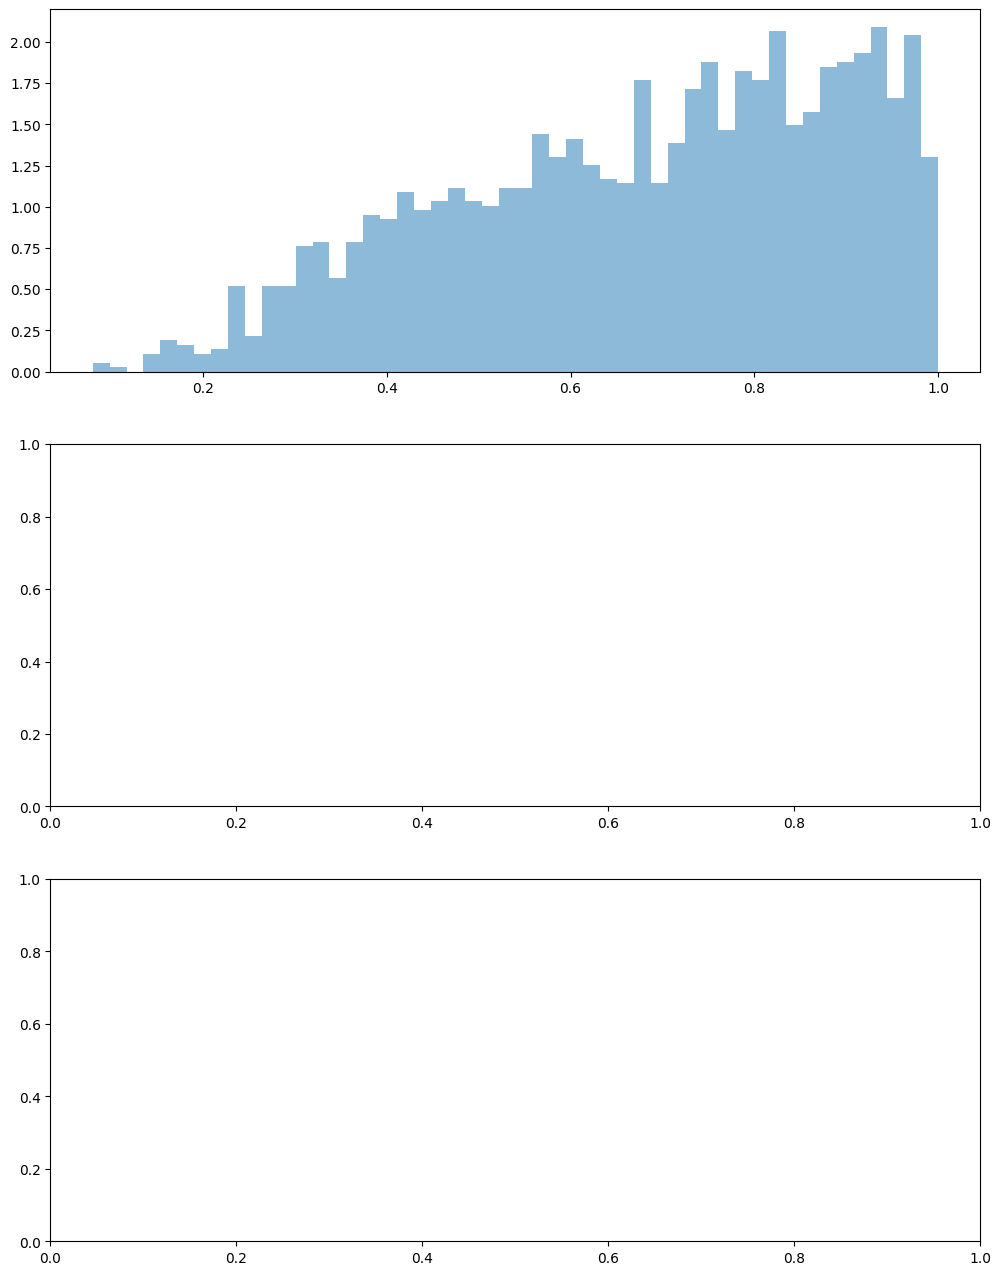

In [11]:
gate_idx =0
trot = 1
N_r = 1
N_ctrl = 2
#/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_3/reservoirs_1/trotter_step_9/bath_False/testing_preopt/trainingset_A4_rep_A7.pickle

a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)

fig, axs = plt.subplots(3,1,figsize=(12, 16))
ax = axs[0]
# gate_idx =gate_idx + 1
preopt_results = df['selected_indices'][0]
print(preopt_results)
costs = [i for i in df['costs'][0]]
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch = [max(arr) for arr in grads_per_epoch]
testing_results = df['test_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['training_states'][0][0])
print("init_params: ",df['init_params'][0])
label1 =f"A4_rep_A7"

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [i for i in df['test_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5, density=True, label=label1)  # Normalize histogram

print(f"final_cost: {costs[-1]:4e}. avg fidelity 1: {np.mean(test_results):3e} +- {np.std(test_results):3e}")

b =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A7_rep_A9.pickle'

with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)


grads_per_epoch2 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch2 = [max(arr) for arr in grads_per_epoch2]
costs2 =  [i for i in df['costs'][0]]

fidelity2 = df['avg_fidelity'][0]

label2 =  f"A7_rep_A9"

try:
    test_results2 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results2 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs2[-1]:4e}. avg fidelity 2: {np.mean(test_results2):3e} +- {np.std(test_results2):3e}")
ax.hist(test_results2, bins=50, alpha=0.5, density=True, label = label2)


c =f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A4_rep_A9.pickle'

with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)


grads_per_epoch3 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch3 = [max(arr) for arr in grads_per_epoch3]
costs3 =  [i for i in df['costs'][0]]

fidelity3 = df['avg_fidelity'][0]

label3 =  f"A4_rep_A9"

try:
    test_results3 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results3 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs3[-1]:4e}. avg fidelity 3: {np.mean(test_results3):3e} +- {np.std(test_results3):3e}")


ax.hist(test_results3, bins=50, alpha=0.5, density=True, label = label3)


# Define paths to the additional data files
d = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A9_rep_A7.pickle'
e = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/trainingset_A8_rep_A7.pickle'
# Load and plot the fourth dataset
with open(d, 'rb') as f:
    df = pickle.load(f)

label4 = f"A9_rep_A7"
costs4 = [i for i in df['costs'][0]]
grads_per_epoch4 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch4 = [max(arr) for arr in grads_per_epoch4]
test_results4 = df['testing_results'][0]
ax.hist(test_results4, bins=50, alpha=0.5, density=True,  label=label4)

print(f"final_cost: {costs4[-1]:4e}. avg fidelity 4: {np.mean(test_results4):3e} +- {np.std(test_results4):3e}")

# Load and plot the fifth dataset
with open(e, 'rb') as f:
    df = pickle.load(f)

label5 = f"A8_rep_A7"
costs5 = [i for i in df['costs'][0]]
grads_per_epoch5 = [np.array(i) for i in df['grads_per_epoch'][0]]
max_grads_per_epoch5 = [max(arr) for arr in grads_per_epoch5]
test_results5 = df['testing_results'][0]
ax.hist(test_results5, bins=50, alpha=0.5, density=True,  label=label5)

print(f"final_cost: {costs5[-1]:4e}. avg fidelity 5: {np.mean(test_results5):3e} +- {np.std(test_results5):3e}")


# ax.set_ylim([0.0,1.0])

ax.legend()


# Plot costs for all datasets
axs[1].plot(range(1, len(costs) + 1), costs, label=label1)
axs[1].plot(range(1, len(costs2) + 1), costs2, label=label2)
axs[1].plot(range(1, len(costs3) + 1), costs3, label=label3)
axs[1].plot(range(1, len(costs4) + 1), costs4, label=label4)
axs[1].plot(range(1, len(costs5) + 1), costs5, label=label5)
axs[1].legend()

# Plot max gradient per epoch for all datasets
axs[2].plot(range(1, len(max_grads_per_epoch) + 1), max_grads_per_epoch, label=label1)
axs[2].plot(range(1, len(max_grads_per_epoch2) + 1), max_grads_per_epoch2, label=label2)
axs[2].plot(range(1, len(max_grads_per_epoch3) + 1), max_grads_per_epoch3, label=label3)
axs[2].plot(range(1, len(max_grads_per_epoch4) + 1), max_grads_per_epoch4, label=label4)
axs[2].plot(range(1, len(max_grads_per_epoch5) + 1), max_grads_per_epoch5, label=label5)
axs[2].legend()

# plt.show()/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost3/U2_0/reservoirs_1/trotter_step_1/bath_False/data_run_0.pickle

In [ ]:
len(grads_per_epoch3[0])

In [ ]:
gate_idx =9
trot = 15
N_r = 1
N_ctrl = 2
#/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/U2_3/reservoirs_1/trotter_step_9/bath_False/testing_preopt/trainingset_A4_rep_A7.pickle
# a = f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/test22/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
a = f'/Users/sophieblock/QRCCapstone/digital_results_trainable_global/trainsize_20_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/testing_preopt/data_run_0.pickle'
with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)

fig, ax = plt.subplots(figsize=(16, 9))
# gate_idx =gate_idx + 1
costs = [i for i in df['costs'][0]]
grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
testing_results = df['test_results'][0]
fidelity = df['avg_fidelity'][0]
# print(df['training_states'][0][0])
print("init_params: ",df['init_params'][0])
label1 =f"test 22: {fidelity:6e}"

gate = df['Gate'][0]
decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
#print(decoded_qobj)
test_results = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
ax.hist(test_results, bins=50, alpha=0.5,label = label1)
print(f"final_cost: {costs[-1]:4e}. avg fidelity 1: {np.mean(test_results):3e} +- {np.std(test_results):3e}")

trot = 10
c =f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_20_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_1/trotter_step_{trot}/bath_False/data_run_0.pickle'

with open(c, 'rb') as f:  # Note 'rb' here, which means read binary
    df = pickle.load(f)



costs3 =  [i for i in df['costs'][0]]

fidelity3 = df['avg_fidelity'][0]

label3 =  f"digital (trots: {trot}): {fidelity3:6e}"

try:
    test_results3 = [i for i in df['testing_results'][0]]  # Add this line to read the test results if needed
except KeyError:
    test_results3 = [i for i in df['fidelities'][0]] 

print(f"final_cost: {costs3[-1]:4e}. avg fidelity 3: {np.mean(test_results3):3e} +- {np.std(test_results3):3e}")


ax.hist(test_results3, bins=50, alpha=0.5,label = label3)

ax.legend()


In [ ]:
plt.plot(range(1,len(costs)+1),costs, label = label1)

plt.plot(range(1,len(costs3)+1),costs3, label = label3)
#plt.plot(range(1,len(costs3)+1),costs3)
plt.legend()


In [ ]:
temp = [el for el in testing_results if el <0.0]
print(len(temp))

temp = [el for el in testing_results3 if el <0.0]
print(len(temp))

In [ ]:
temp = [el for el in test_results if el <0.0]
print(temp)

In [ ]:
test_results3
temp = [el for el in test_results3 if el <0.0]
print(temp)

In [ ]:
gate_idx = 1
trot = 2
N_r = 1
N_ctrl = 1
selected_sets = [0]  # List of dataset indices

def calculate_iqr(data):
    """
    Calculate the Interquartile Range (IQR) of the input data.
    """
    iqr = np.percentile(data, 85) - np.percentile(data, 15)
    return iqr
tests = ['test22','test53','test31','test50', 'test94','test121','test44','test125']
# Initialize the paths to the datasets (as a loop)
data_files = [f'/Users/sophieblock/QRCCapstone/param_initialization/analog_results/Nc_{N_ctrl}/reservoirs_{N_r}/trotter_step_{trot}/10_training_states_no_opt/fixed_params0/1.0K/{test_key}/U{N_ctrl}_{gate_idx}/data_run_0.pickle'
                for test_key in tests]

def calculate_gradient_stats(gradients):
    mean_grad = jnp.mean(gradients, axis=0)
    mean_grad_squared = jnp.mean(gradients**2, axis=0)
    var_grad = mean_grad_squared - mean_grad**2
    return mean_grad, var_grad

threshold = 10e-14
# Load the datasets and extract relevant data
data_results = {}
for i,file_path in enumerate(data_files):
    with open(file_path, 'rb') as f:
        data = pickle.load(f)
    
    # Extract necessary information from the dataset
    costs = [float(i) for i in data['costs'][0]]
    grads_per_epoch = [np.array(i) for i in data['grads_per_epoch'][0]]
    init_grads = grads_per_epoch[0]
    

    # print(init_grads.shape, np.abs((init_grads)),init_grads)
    testing_results = data['testing_results'][0]
    fidelity = data['avg_fidelity'][0]
    # avg_fidelity = np.mean(fidelity)
    opt_lr = data['opt_lr'][0]
    trainin_states = data['training_states'][0][0]
    

    var_nonzero_grads = []
    for grads in grads_per_epoch:
        

        nz_grads = [res for res in grads if np.abs(res) > threshold]
        # if tests[i] == 'test50':
        #     print(nz_grads)
        var_nonzero_grads.append(np.var(nz_grads))
    var_grad = [np.var(grads) for grads in grads_per_epoch]
    min_grad = [np.min(np.abs(grads)) for grads in grads_per_epoch]
    max_grad = [np.max(np.abs(grads)) for grads in grads_per_epoch]

    iqr_var_grad = calculate_iqr(jnp.array(init_grads))
    mean_fidelity = round(float(np.mean(testing_results)), 5)
    std_fidelity = round(float(np.std(testing_results)), 5)
    # Print the results
    print(f"\nAverage Fidelity ({tests[i]}): {mean_fidelity} ± {std_fidelity}")
    # print(f"Initial Variance ({tests[i]}): {np.var(init_grads):.5e}, IQR: {iqr_var_grad:.5e}, Min Gradient: {np.min(np.abs(init_grads)):.5e}, Max Grad: {np.max(np.abs(init_grads)):.5e}")

    # print(f"From test: {np.mean(data['var_grad'][0]):.5e}, IQR: {calculate_iqr(data['var_grad'][0]):.5e}, Min Gradient: {data['min_grad'][0]:.5e}, Max Grad: {data['max_grad'][0]:.5e}")

    
    mean_grad, var_grad_out = calculate_gradient_stats(init_grads)
    

    

    data_results[tests[i]] = {
        'costs': costs,
        'var_grad': var_grad,
        'var_nonzero_grads':var_nonzero_grads,
        'min_grad': min_grad,
        'max_grad': max_grad,
        'avg_fidelity':fidelity,
        'testing_results': testing_results
    }


In [ ]:

# Now plot the results
fig, ax = plt.subplots(5, 1, figsize=(8, 20))

# Loop over datasets and add each to the plots
for test_key, dataset in data_results.items():
    # Dynamically label the dataset for each selected set
    avg_fidelity = dataset['avg_fidelity']
    label = f'{test_key} [ {avg_fidelity:.5f}]'
    
    # Plot testing results (histograms)
    ax[0].hist([float(i) for i in dataset['testing_results']], bins=50, alpha=0.5, label=f'{label}')
    
    # Plot costs per epoch
    ax[1].plot(range(1, len(dataset['costs']) + 1), dataset['costs'], label=label)
    
    # Plot variance of gradients per epoch
    ax[2].plot(range(1, len(dataset['var_nonzero_grads']) + 1), dataset['var_nonzero_grads'], label=label)
    ax[2].set_yscale('log')
    # Plot minimum absolute value of gradients per epoch
    ax[3].plot(range(1, len(dataset['min_grad']) + 1), dataset['min_grad'],linewidth=1, label=label)
    ax[3].set_yscale('log')
    # Plot maximum absolute value of gradients per epoch
    ax[4].plot(range(1, len(dataset['max_grad']) + 1), dataset['max_grad'], label=label)
    ax[4].set_yscale('log')

# Customize the plot titles, labels, and legends
ax[0].set_title('Test Results (Fidelity)')
ax[0].set_xlabel('Fidelity')
ax[0].set_ylabel('Frequency')
ax[0].legend(fontsize=12)

ax[1].set_title('Costs per Epoch')
ax[1].set_xlabel('Epoch')
ax[1].set_ylabel('Cost')
ax[1].legend(fontsize=12)

ax[2].set_title('Variance of Gradients per Epoch')
ax[2].set_xlabel('Epoch')
ax[2].set_ylabel('Variance')
ax[2].legend(fontsize=12)

ax[3].set_title('Minimum Absolute Value of Gradients per Epoch')
ax[3].set_xlabel('Epoch')
ax[3].set_ylabel('Min Abs Gradient')
ax[3].set_yscale('log')  # Log scale as before
ax[3].legend(fontsize=12)

ax[4].set_title('Maximum Absolute Value of Gradients per Epoch')
ax[4].set_xlabel('Epoch')
ax[4].set_ylabel('Max Abs Gradient')
ax[4].legend(fontsize=12)

plt.tight_layout()
plt.show()

In [ ]:
gate_idx =1
trot = 7
N_r = 1
N_ctrl = 2
for gate_idx in range(0,20):
    print(f"U{N_ctrl}_{gate_idx}")
    a = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost3/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    with open(a, 'rb') as f:  # Note 'rb' here, which means read binary
        df = pickle.load(f)

    fig, ax = plt.subplots(figsize=(16, 9))

    costs = [float(i) for i in df['costs'][0]]
    grads_per_epoch = [np.array(i) for i in df['grads_per_epoch'][0]]
    testing_results = df['testing_results'][0]
    fidelity = 1 - df['avg_fidelity'][0]

    label1 =f"new lr: {df['opt_lr'][0]}"
    gate = df['Gate'][0]
    decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))
    #print(decoded_qobj)
    test_results = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
    ax.hist(test_results, bins=50, alpha=0.5,label = label1)
    print(f"avg fidelity 1: {np.mean(test_results)} +- {np.std(test_results)}")

    # b = f'/Users/sophieblock/QRCCapstone/analog_results_trainable_global/trainsize_10_optimized_by_cost/0/U{N_ctrl}_{gate_idx}/reservoirs_{N_r}/trotter_step_{trot}/bath_False/data_run_0.pickle'
    # try:
    #     with open(b, 'rb') as f:  # Note 'rb' here, which means read binary
    #         df = pickle.load(f)



    #     costs2 = [float(i) for i in df['costs'][0]]
    #     testing_results2 = df['testing_results'][0]
    #     fidelity2 = 1 - df['avg_fidelity'][0]

    #     label2 = f"old lr: {df['opt_lr'][0]}"
    #     gate = df['Gate'][0]
    #     decoded_qobj = pickle.loads(base64.b64decode(gate.encode('utf-8')))

    #     test_results2 = [float(i) for i in df['testing_results'][0]]  # Add this line to read the test results if needed
    #     ax.hist(test_results2, bins=50, alpha=0.5,label = label2)
    #     print(f"avg fidelity 3: {np.mean(test_results2)} +- {np.std(test_results2)}")
    # except FileNotFoundError:
    #     pass
    
    ax.legend()

In [ ]:
a = [1,2,3]
print(a[:1])

In [ ]:
20 // 5